In [1]:

import streamlit as st
import pandas as pd
from datetime import date
import numpy as np
import time
from pystac_client import Client
from shapely import geometry 
import rioxarray
import requests
import matplotlib.pyplot as plt
import sys
import random

from datetime import datetime
from google.cloud import storage
import json

In [19]:
bucket_name = 'peru_chips'
date = 'Alto_Tamaya/02-21-2023'
blob_pic_name ='Alto_Tamaya/01-22-2023/3139.json' 

# Create a client object for interacting with the Google Cloud Storage API
client = storage.Client()

# Get a reference to the bucket containing the JSON file
bucket = client.bucket(bucket_name)

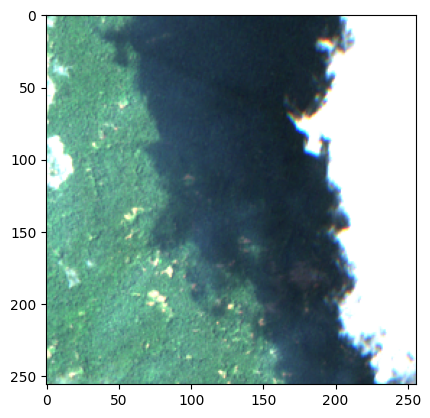

In [20]:
plt.imshow(read_json_from_bucket(bucket, f'{blob_pic_name}'))

In [3]:
def read_json_from_bucket(bucket, blob_name):


    # Get a reference to the blob (i.e., the JSON file) in the bucket
    blob = bucket.blob(blob_name)

    # Download the JSON file to a local file object
    file_contents = blob.download_as_string()

    # Load the JSON data into a Python dictionary
    data = json.loads(file_contents)

    # Print the contents of the dictionary

    # Visualize the data using plt.imshow() if it contains an image
    
    return data['rgb_chip']
#     plt.imshow(data['rgb_chip'])
#     plt.show()







In [4]:
# read_json_from_bucket(bucket, f'{date}/1000.json')

In [5]:
blobs = list(bucket.list_blobs())
len(blobs)

5003

In [8]:
col_pics = 1
random_pics = random.sample(range(0, len(blobs)), col_pics**2) 
random_pics

[3436]

NotFound: 404 GET https://storage.googleapis.com/download/storage/v1/b/peru_chips/o/12-08-2022%2F4623.json?alt=media: No such object: peru_chips/12-08-2022/4623.json: ('Request failed with status code', 404, 'Expected one of', <HTTPStatus.OK: 200>, <HTTPStatus.PARTIAL_CONTENT: 206>)

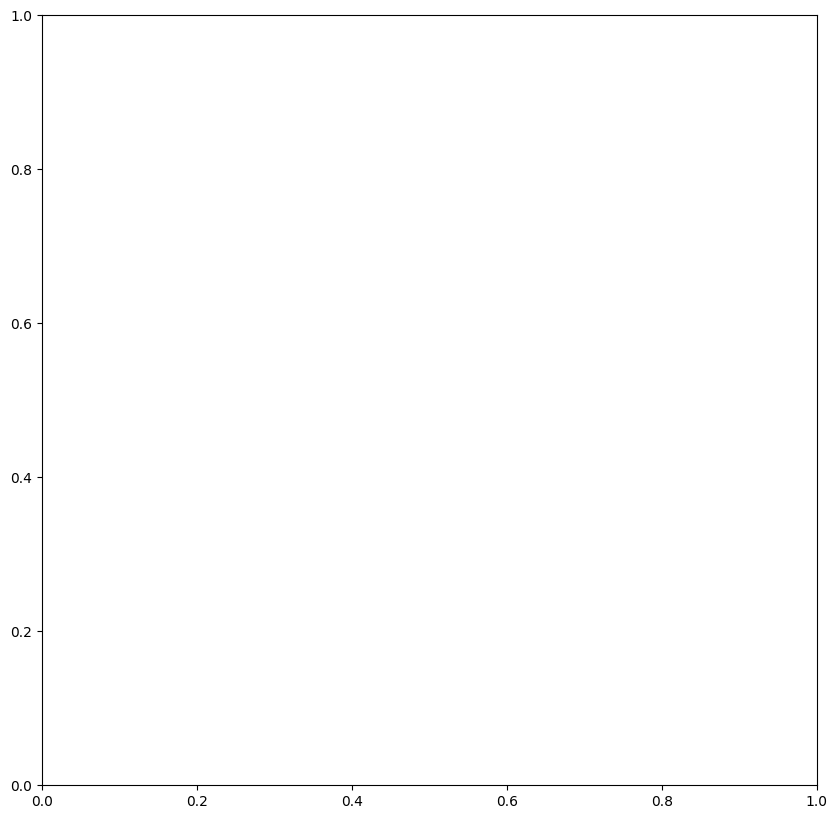

In [7]:
# Create a figure object and set its size
fig = plt.figure(figsize=(10, 10))

# Create a 5x5 grid of subplots
rows, cols = col_pics, col_pics
for i in range(rows * cols):
    ax = fig.add_subplot(rows, cols, i+1)

    # Plot the current image on the current subplot
    ax.imshow(read_json_from_bucket(bucket, f'{date}/{random_pics[i]}.json'))

    # Remove the x and y axis ticks from the plot
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# Show the resulting image grid
plt.show()

In [37]:
2000/60

33.333333333333336